In [2]:
from IPython.core.display import display, HTML
display(HTML("""<style>
.container { width:99% !important; }
div.text_cell_render { /* Customize text cells */
    font-size:1.5em;
    line-height:1.4em;
    padding-left:3em;
    padding-right:3em;
}
</style>"""))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Temporal variation of Complexity using different tau values

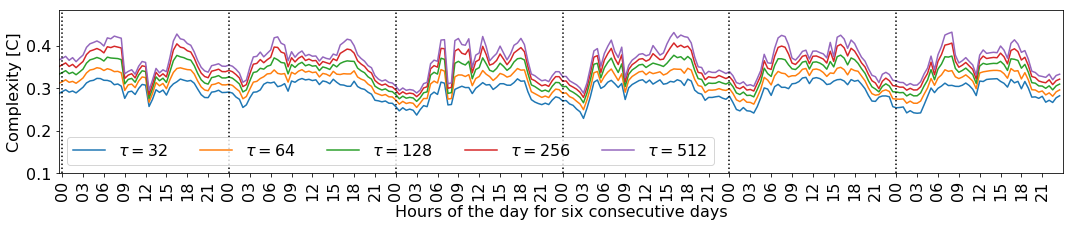

In [4]:
lags = [32, 64, 128, 256, 512] 

plt.figure(figsize=(18,3))
plt.rc('font', size=16)
plt.rc('axes', titlesize=16)

for i,lag in enumerate(lags):
    base = pd.read_pickle('./pkl_datasets/mamiraua_dataset_ACF_' + str(lag) + '.gzip')
    cotas = pd.read_csv('./boundary_files/Cotas_HxC_bins_' + str(int(lag)) + '.csv')
    noise = pd.read_csv('./coloredNoises/coloredNoises_' + str(int(lag)) + '.csv')

    time = np.unique(base['time'])
    date = np.unique(base['date'])
    H_mu = np.empty((0))
    C_mu = np.empty((0))
    JSD_mu = np.empty((0))

    t = np.empty(0)

    for i in date:
        for j in time:
            t = np.append(t,str(j[0:2]))
            H = base.loc[(base['date'] == i) & (base['time'] == j)]['H']
            C = base.loc[(base['date'] == i) & (base['time'] == j)]['C']
            JSD = base.loc[(base['date'] == i) & (base['time'] == j)]['JSD']

            H_mu = np.append(H_mu,np.mean(H))
            C_mu = np.append(C_mu,np.mean(C))
            JSD_mu = np.append(JSD_mu,np.mean(JSD))

    plt.plot(C_mu, label=r'$\tau=$'+str(lag))
    
plt.axvline(x=336,color='k', linestyle=':')
plt.axvline(x=384,color='k', linestyle=':')
plt.axvline(x=432,color='k', linestyle=':')
plt.axvline(x=480,color='k', linestyle=':')
plt.axvline(x=528,color='k', linestyle=':')
plt.axvline(x=576,color='k', linestyle=':')
plt.ylabel('Complexity [C]')
plt.xlabel('Hours of the day for six consecutive days')
step = 6
rot = 90
plt.xticks(np.arange(0,len(t),step), t[np.arange(0,len(t),step)], rotation=rot)
plt.xlim([335, len(t)])
plt.ylim([0.1, np.max(cotas['Complexity'])])
plt.legend(loc = 'lower left', ncol=5)
plt.savefig('./figures/Fig8.eps', format="eps", bbox_inches='tight')
plt.show()